In [21]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile al 75 - quantile al 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #formula di Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

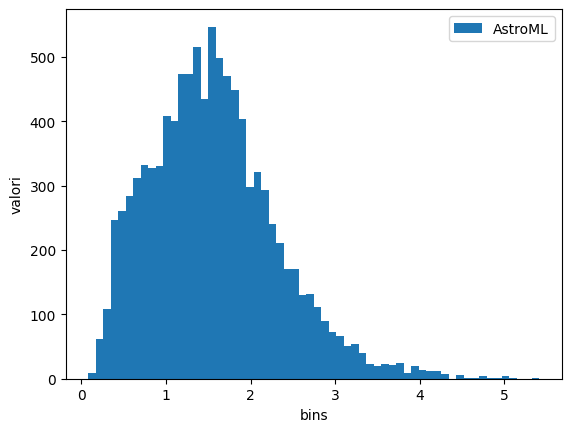

In [30]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np


# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
N = 10000
data = data[:N]

z = data['redshift']


plt.hist(z, bins = bins_num(z), label = "AstroML")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend() 
plt.show()

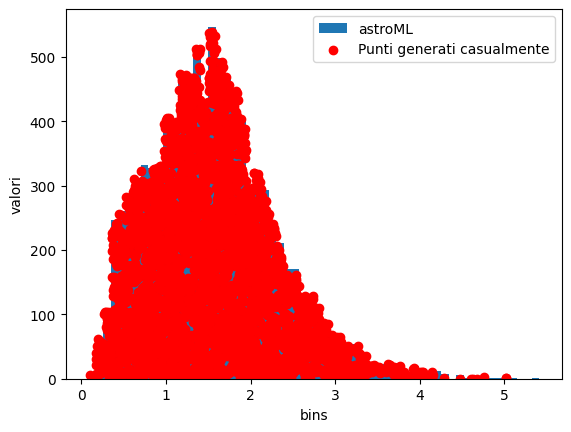

In [33]:
plt.hist(z, bins_num(z),label="astroML") #plot cui sovrappongo i punti generati

values , bins = np.histogram(z, bins_num(z)) #estraggo i parametri dall'istogramma, values contiene conteggio degli elementi di z che cadono in ciascun bin, bins contiene i bordi dei bin

x = np.random.uniform(0,max(bins), N) #generazione uniforme
y = np.random.uniform(0,max(values), N)

x_filtered = []
y_filtered = []

for i in range(N):
        bin_index = np.digitize(x[i], bins) - 1  # trova il corrispondente bin di x[i]
        if y[i] < values[bin_index]:  # prende il punto se Y[i] minore dell'istogramma
            x_filtered.append(x[i])
            y_filtered.append(y[i])

plt.scatter(x_filtered,y_filtered , color='red', marker='o', label = "Punti generati casualmente")  
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend() 
plt.show()


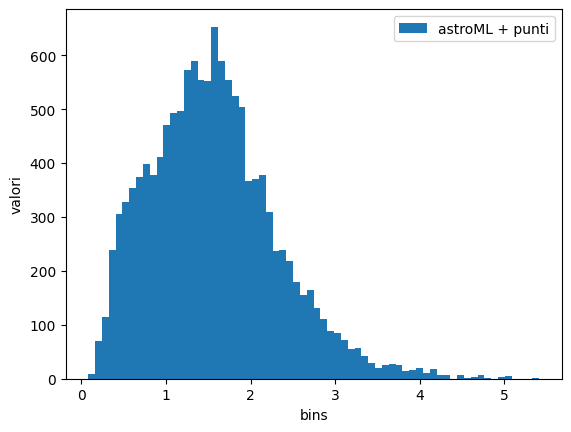

In [34]:
z_augmented = np.concatenate([z, x_filtered])

plt.hist(z_augmented, bins_num(z_augmented) , label = "astroML + punti" )
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()
plt.show()


**Ricaviamo la CDF**

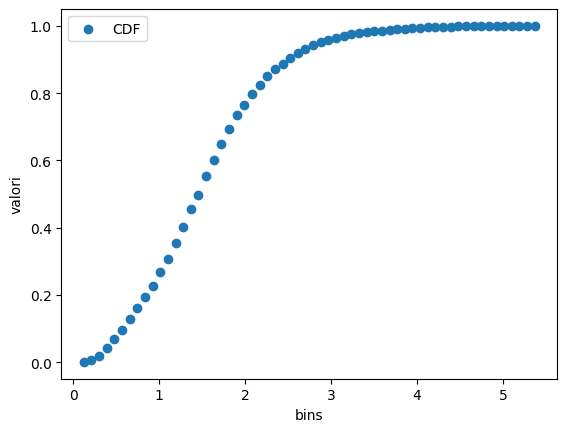

In [35]:
somma = np.sum(values) 
values = values/somma #normalizzazione

cdf = np.cumsum(values) #magiche funzioni di python

bin_center = ((bins[:-1] + bins[1:])/2)

plt.scatter(bin_center,cdf,label="CDF")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()
plt.show()

**Ricavo la quantile, cioè l'inversa della CDF**


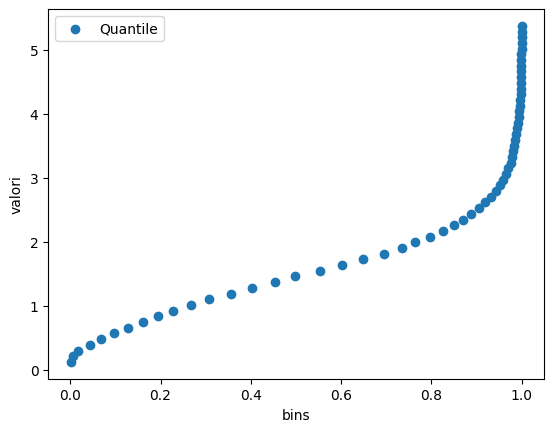

In [36]:
#ho semplicemente invertito x e y dei punti --> inversa è uguale a simmetrica rispetto bisettrice primo/terzo per funzioni monotone crescenti
x_quantile = cdf
y_quantile = bin_center

plt.scatter(x_quantile,y_quantile,label="Quantile") 
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()
plt.show()

**Genero numeri uniformi in X --> metodo dell'inversa**


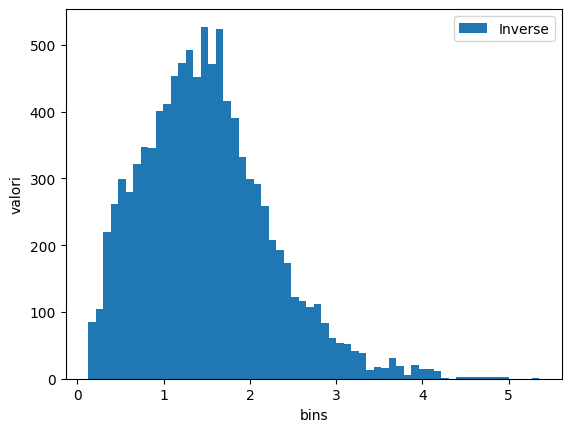

In [37]:
num = np.random.uniform(0,1,N)

y_rand = np.interp(num, x_quantile, y_quantile) #funzione che ricava la y dai punti discreti 

plt.hist(y_rand, bins_num(y_rand) , label = "Inverse")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()
plt.show()

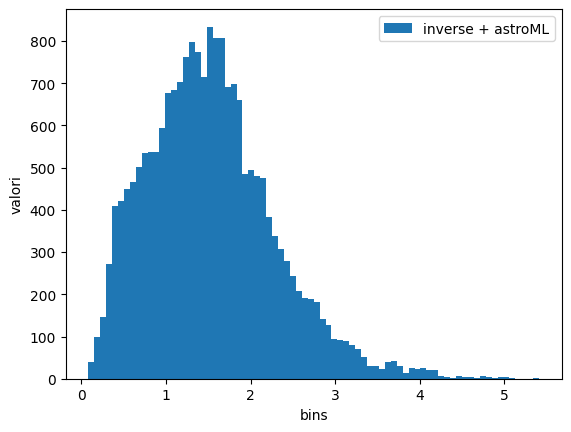

In [39]:
z_augmented_2 = np.concatenate([z, y_rand])

plt.hist(z_augmented_2, bins_num(z_augmented_2), label = "inverse + astroML")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend()
plt.show()

**Confronto**

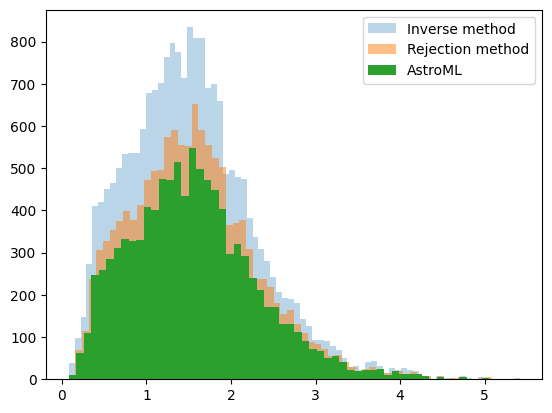

In [41]:
plt.hist(z_augmented_2, bins_num(z_augmented_2), alpha = 0.3, label = "Inverse method") 
plt.hist(z_augmented, bins_num(z_augmented), alpha = 0.5, label = "Rejection method") 
plt.hist(z, bins_num(z), label = "AstroML") 
plt.legend()
plt.show()

**Studio dei residui**

